In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df=pd.read_csv(r"D:\Python Home Work\ML programming\Social_Network_Ads.csv")

In [16]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [18]:
df.shape

(400, 5)

In [20]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [21]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [41]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'column_to_encode' is the column you want to encode
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Gender           400 non-null    int32
 2   Age              400 non-null    int64
 3   EstimatedSalary  400 non-null    int64
 4   Purchased        400 non-null    int64
dtypes: int32(1), int64(4)
memory usage: 14.2 KB


In [45]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [46]:
df['Purchased'].unique()

array([0, 1], dtype=int64)

In [47]:
x=df.drop('Purchased',axis=1)
y=df['Purchased']

In [48]:
x

,User ID,Gender,Age,EstimatedSalary
0,15624510,1,19,19000
1,15810944,1,35,20000
2,15668575,0,26,43000
3,15603246,0,27,57000
4,15804002,1,19,76000
...,...,...,...,...
395,15691863,0,46,41000
396,15706071,1,51,23000
397,15654296,0,50,20000
398,15755018,1,36,33000


In [49]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [50]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# LGBoost classifier

In [51]:
from lightgbm import LGBMClassifier
lg_clas=LGBMClassifier()
lg_clas.fit(x_train,y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 121, number of negative: 199
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000645 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 222
[LightGBM] [Info] Number of data points in the train set: 320, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.378125 -> initscore=-0.497514
[LightGBM] [Info] Start training from score -0.497514
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

LGBMClassifier()

In [67]:
#ypred=lg_clas.predict(x_test)

In [68]:
from sklearn.metrics import accuracy_score
#print('LGBM model accuracy {0:0.4f} :'.format(accuracy_score(y_test,ypred)))

In [ ]:
# checking training and test accuracy


In [57]:
ypred_train = lg_clas.predict(x_train)
print('Training accuract :{0:0.4f} '.format(accuracy_score(y_train,ypred_train)))


Training accuract :1.0000 


In [59]:
ypred_test = lg_clas.predict(x_test)
print('Test accuracy :{0:0.4f} '.format(accuracy_score(y_test,ypred_test)))

Test accuracy :0.9125 


In [ ]:
# check overfitting


In [60]:
print('Training set score: {:.4f}'.format(lg_clas.score(x_train, y_train)))
print('Test set score: {:.4f}'.format(lg_clas.score(x_test, y_test)))

Training set score: 1.0000
Test set score: 0.9125


In [ ]:
# confusion matrix

In [61]:
# view confusion-matrix
# Print the Confusion Matrix and slice it into four pieces
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ypred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[55  3]
 [ 4 18]]

True Positives(TP) =  55

True Negatives(TN) =  18

False Positives(FP) =  3

False Negatives(FN) =  4


<Axes: >

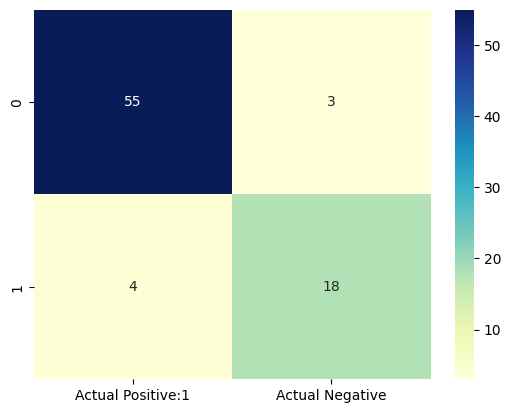

In [64]:
# visualize confusion matrix with seaborn heatmap
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative'])
index=['Predict Positive:1', 'Predict Negative']
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [66]:
from sklearn.metrics import classification_report
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        58
           1       0.86      0.82      0.84        22

    accuracy                           0.91        80
   macro avg       0.89      0.88      0.89        80
weighted avg       0.91      0.91      0.91        80



# LGBM parameter tunning
In this section, I will discuss some tips to improve LightGBM model efficiency.
Following set of practices can be used to improve your model efficiency.
1 num_leaves : This is the main parameter to control the complexity of the tree model. Ideally, the
value of num_leaves should be less than or equal to 2^(max_depth). Value more than this will result
in overfitting.
2 min_data_in_leaf : Setting it to a large value can avoid growing too deep a tree, but may cause
under-fitting. In practice, setting it to hundreds or thousands is enough for a large dataset.
3 max_depth : We also can use max_depth to limit the tree depth explicitly.
For Faster Speed
# faster speed
Use bagging by setting bagging_fraction and bagging_freq. Use feature sub-sampling by setting
feature_fraction. Use small max_bin. Use save_binary to speed up data loading in future learning.
# For better accuracy
Use large max_bin (may be slower). Use small learning_rate with large num_iterations Use large
num_leaves(may cause over-fitting) Use bigger training data Try dart Try to use categorical feature
directly
# To deal with over-fitting
Use small max_bin Use small num_leaves Use min_data_in_leaf and min_sum_hessian_in_leaf
Use bagging by set bagging_fraction and bagging_freq Use feature sub-sampling by set
feature_fraction Use bigger training data Try lambda_l1, lambda_l2 and min_gain_to_split to
regularization Try max_depth to avoid growing deep tree